In [1]:
from google.colab import  drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Colab Notebooks/TestDS

/content/drive/My Drive/Colab Notebooks/TestDS


In [5]:
import pandas as pd
import numpy as np

**user_id** : id of the user. Unique by user

**signup_time**: the time when the user created her account (GMT time)

**purchase_time** : the time when the user bought the item (GMT time)

**purchase_value**: the cost of the item purchased(USD)

**device_id**: the device id . You can assume that is unique by device. I.e., 2 transactions with the same device ID means that the same physical device was used to by

**source**: user marketing channel: ads, SEO, Direct (i.e. came to the site by directly typing the site address on the browser )

**browser** : the browser used by the user.

**sex** :user sex: Male/ Female

**age** : user age

**ip_address**: user numeric ip address

**class**: this is what we are trying to predict: whether the acivity was fraudulent(1) or not(0)

**"IpAddress_to_Country"**- mapping each numeric ip address to its country.For each country, it gives a range . If the numeric ip address falls within the range, then the ip address belongs to the corresponding country

- **lower_bound_ip_address**: the lower bound of the numeric ip address for that country
- **upper_bound_ip_address**: the upper bound of the numeric ip address for that country
- **country**: the corresponding country.If a user has an ip address whose value is within the upper and lower bound, then she is based in this country


In [9]:
with open("/content/drive/My Drive/Colab Notebooks/TestDS/Fraud_Data.csv","r")as f:
  dataFraud = pd.read_csv("Fraud_Data.csv")

In [10]:
with open("/content/drive/My Drive/Colab Notebooks/TestDS/IpAddress_to_Country.csv","r") as f:
  dataIp = pd.read_csv("IpAddress_to_Country.csv")

In [11]:
dataFraud.head()

user_id          signup_time        purchase_time  ...  age    ip_address class
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11  ...   39  7.327584e+08     0
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54  ...   53  3.503114e+08     0
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45  ...   53  2.621474e+09     1
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50  ...   41  3.840542e+09     0
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53  ...   45  4.155831e+08     0

[5 rows x 11 columns]

In [13]:
dataIp.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [14]:
labelsData = dataFraud["class"].values

In [15]:
labelsData

array([0, 0, 1, ..., 0, 0, 0])

## Kiểm tra data


In [17]:
dataFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [20]:
check_for_nan = dataFraud.isnull().values.any() # test nan again
print (check_for_nan)  

False


In [19]:
len(dataFraud) 

151112

In [22]:
dataIp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [23]:
len(dataIp)

138846

In [24]:
check_for_nan_ip = dataIp.isnull().values.any() # test nan again
print (check_for_nan_ip)  

False


- Ta thấy trong dataFraud có 11 feature tương ứng vớ 151112 sample và trong mỗi feature không có feature nào là nan
- Trong dataIp có 3 feature tương ứng 138846 sample và trong mỗi sample không có giá trị nào là nan .
- Now , Ta sẽ đi tìm những mối quan hệ giữa các feature với targer là class

In [26]:
import matplotlib.pyplot as plt


In [27]:
dataFraud.head()

user_id          signup_time        purchase_time  ...  age    ip_address class
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11  ...   39  7.327584e+08     0
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54  ...   53  3.503114e+08     0
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45  ...   53  2.621474e+09     1
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50  ...   41  3.840542e+09     0
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53  ...   45  4.155831e+08     0

[5 rows x 11 columns]

In [30]:
age = dataFraud["age"]
user_id = dataFraud["user_id"]
purchase_value = dataFraud["purchase_value"]
device_id = dataFraud["device_id"]
source = dataFraud["source"]
browser = dataFraud["browser"]
sex = dataFraud["sex"]


pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

In [46]:
dataFraud.corr(method ='pearson')
  # Ta dùng hệ số tương quản chuẩn (standard) để biểu diễn độ mạnh yếu quan hệ giữa 2 feature

user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.002617  0.000611   -0.003144  0.001945
purchase_value  0.002617        1.000000  0.002370   -0.000328  0.001011
age             0.000611        0.002370  1.000000    0.001140  0.006624
ip_address     -0.003144       -0.000328  0.001140    1.000000 -0.005208
class           0.001945        0.001011  0.006624   -0.005208  1.000000

<function matplotlib.pyplot.show>

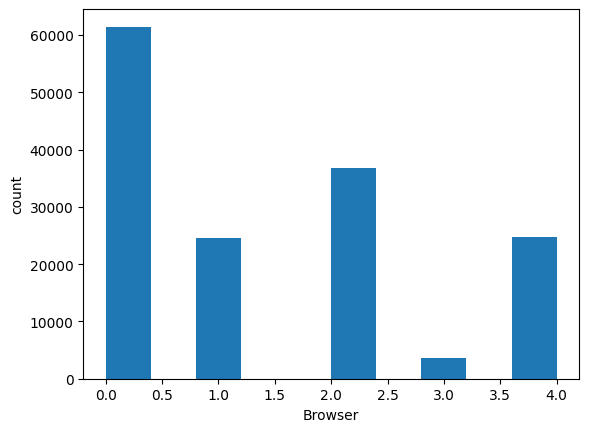

In [162]:
plt.hist(x=browser,)
plt.ylabel("count")
plt.xlabel("Browser")
plt.show
#Ta thấy người dùng Chrome rất được mọi người dùng nhiều hơn các trình duyệt khác.
#Có thể là thói quen , cũng có thể là speed của từng trình duyệt cũng như bảo mật

#Fit and Train model


In [76]:
from sklearn.preprocessing import OrdinalEncoder #Labels encoding
from sklearn import preprocessing
cat_enc = OrdinalEncoder()
X = [['Opera', 1], ['Safari', 2], ['FireFox', 3],['IE',4],['Chrome',5]]
cat_enc.fit(X)
dataFraud['browser'] = cat_enc.fit_transform(dataFraud.browser.values.reshape(-1, 1))

In [78]:
dataFraud['browser'][:10]

0    0.0
1    0.0
2    3.0
3    4.0
4    4.0
5    0.0
6    0.0
7    3.0
8    2.0
9    2.0
Name: browser, dtype: float64

In [132]:
df = pd.DataFrame(dataFraud[['user_id','user_id','purchase_value','browser']])

In [133]:
df

user_id  user_id  purchase_value  browser
0         22058    22058              34      0.0
1        333320   333320              16      0.0
2          1359     1359              15      3.0
3        150084   150084              44      4.0
4        221365   221365              39      4.0
...         ...      ...             ...      ...
151107   345170   345170              43      0.0
151108   274471   274471              35      4.0
151109   368416   368416              40      2.0
151110   207709   207709              46      0.0
151111   138208   138208              20      2.0

[151112 rows x 4 columns]

In [136]:
train_features = np.array(df)

In [137]:
train_features

array([[2.20580e+04, 2.20580e+04, 3.40000e+01, 0.00000e+00],
       [3.33320e+05, 3.33320e+05, 1.60000e+01, 0.00000e+00],
       [1.35900e+03, 1.35900e+03, 1.50000e+01, 3.00000e+00],
       ...,
       [3.68416e+05, 3.68416e+05, 4.00000e+01, 2.00000e+00],
       [2.07709e+05, 2.07709e+05, 4.60000e+01, 0.00000e+00],
       [1.38208e+05, 1.38208e+05, 2.00000e+01, 2.00000e+00]])

In [139]:
size = int(len(train_features)*0.7)
size

105778

In [140]:
train = train_features[:size]
valid = train_features[size:]

labels = labelsData[:size]
valid_lables = labelsData[size:]

In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import Regularizer

In [161]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [151]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history= model.fit(train,labels, 
          epochs=10,
          validation_data=(valid,valid_lables))

Epoch 1/10
3306/3306 [==============================] - 5s 1ms/step - loss: 228.3915 - acc: 0.8170 - val_loss: 58.6308 - val_acc: 0.9058
Epoch 2/10
3306/3306 [==============================] - 5s 1ms/step - loss: 34.4100 - acc: 0.8293 - val_loss: 24.2471 - val_acc: 0.9058
Epoch 3/10
3306/3306 [==============================] - 4s 1ms/step - loss: 38.1999 - acc: 0.8293 - val_loss: 38.6514 - val_acc: 0.9058
Epoch 4/10
3306/3306 [==============================] - 5s 1ms/step - loss: 34.9177 - acc: 0.8313 - val_loss: 12.3442 - val_acc: 0.9056
Epoch 5/10
3306/3306 [==============================] - 5s 1ms/step - loss: 42.6820 - acc: 0.8306 - val_loss: 45.0899 - val_acc: 0.9058
Epoch 6/10
3306/3306 [==============================] - 5s 1ms/step - loss: 35.8493 - acc: 0.8302 - val_loss: 22.5838 - val_acc: 0.9058
Epoch 7/10
3306/3306 [==============================] - 4s 1ms/step - loss: 34.8459 - acc: 0.8299 - val_loss: 0.7668 - val_acc: 0.9057
Epoch 8/10
3306/3306 [==========================

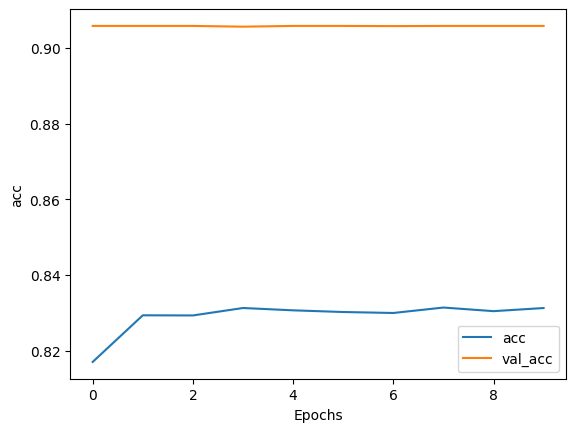

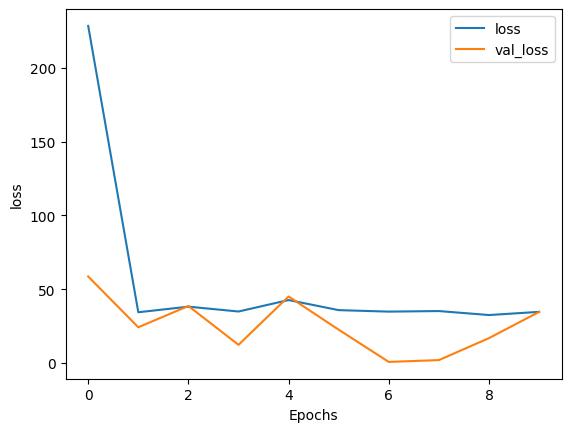

In [152]:
import matplotlib.pyplot as plt

def plot_graphs(history, setting):
  plt.plot(history.history[setting])
  plt.plot(history.history['val_'+setting])
  plt.xlabel("Epochs")
  plt.ylabel(setting)
  plt.legend([setting, 'val_'+setting])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")